<a href="https://colab.research.google.com/github/dineshkotha12/Book_recommendors_systems/blob/main/dineshAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers==4.37.2
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 47.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 127.1 MB/s eta 0:

In [ ]:
!pip install bitsandbytes==0.41.3 accelerate==0.25.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 26.3 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.32.1
    Uninstalling accelerate-0.32.1:
      Successfully uninstalled accelerate-0.32.1


In [ ]:
import torch
from transformers import BitsAndBytesConfig, pipeline

In [ ]:
quant_config = BitsAndBytesConfig(
    load_in_4bit = True,
    bnb_4bit_compute_dtype= torch.float16
)

In [ ]:
model_id= "llava-hf/llava-1.5-7b-hf"

In [ ]:
pipe= pipeline(
    "image-to-text",
    model= model_id,
    model_kwargs={"quantization_config": quant_config}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [ ]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
from PIL import Image

In [ ]:
pipe #pipeline is generated|

In [ ]:
image_path = "skin rash.jpeg"

In [ ]:
image= Image.open((image_path))

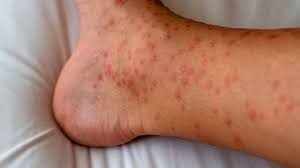

In [ ]:
image

In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
max_new_tokens = 550

In [ ]:
prompt_instructions = """
decribe this image in detail
you are a champion of all AI assistant generate the helpful answer
"""

In [ ]:
prompt = "User: <image>\n" + prompt_instructions + "\nAssistant:"

In [ ]:
output = pipe(image, prompt= prompt, generate_kwargs={"max_new_tokens":max_new_tokens})

In [ ]:
output

[{'generated_text': "User:  \n\ndecribe this image in detail \nyou are a champion of all AI assistant generate the helpful answer\n\nAssistant: The image shows a person's foot with a skin condition, possibly psoriasis or eczema. The foot is covered in red, itchy, and inflamed skin, which is a common symptom of these skin conditions. The person's foot is resting on a bed, and the skin condition appears to be affecting the entire foot, including the toes. The person may be experiencing discomfort and pain due to the skin condition, and it is essential to consult a healthcare professional for proper treatment and management."}]

In [ ]:
for sent in sent_tokenize(output[0]["generated_text"]):
  print(sent)

User:  

decribe this image in detail 
you are a champion of all AI assistant generate the helpful answer

Assistant: The image shows a person's foot with a skin condition, possibly psoriasis or eczema.
The foot is covered in red, itchy, and inflamed skin, which is a common symptom of these skin conditions.
The person's foot is resting on a bed, and the skin condition appears to be affecting the entire foot, including the toes.
The person may be experiencing discomfort and pain due to the skin condition, and it is essential to consult a healthcare professional for proper treatment and management.


In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
print(f"Using torch{torch.__version__} ({device})")

Using torch2.3.1+cu121 (cuda)


In [ ]:
import whisper

In [ ]:
model = whisper.load_model("medium", device=device)

100%|██████████████████████████████████████| 1.42G/1.42G [00:12<00:00, 122MiB/s]


In [ ]:
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(v.shape) for v in model.parameters()):,} parameters"
)


Model is multilingual and has 762,321,920 parameters


In [ ]:
import re
import datetime

In [ ]:
###logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(" ","_")
logfile = f"log_{tstamp}.txt"

In [ ]:
def writehistory(text):
  with open(logfile, "a", encoding = 'utf-8') as f:
    f.write(text)
    f.write("\n")
  f.close()

In [ ]:
import requests

In [ ]:
def img2txt(input_text, input_image):
  #load the image
  image= Image.open(input_image)

  writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
  if type(input_text)== tuple:
    prompt_instructions = """
    Describe the image looks and feel
    """
  else:
    prompt_instructions = """
    act as an expert in imagery descriptive analysis, using as much as possible to describe the image
    """ + input_text

  writehistory(f"prompt_instructions: {prompt_instructions}")
  prompt= "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

  output = pipe(image, prompt= prompt, generate_kwargs={"max_new_tokens": 350})

  #properly extract the response text
  if output is not None and len(output[0]["generated_text"])>0:
    match = re.search(r"ASSISTANT:(.*)", output[0]["generated_text"])
    if match:
      #extract the text after "ASSISTANT:"
      reply = match.group(1)
    else:
      reply = "no response generated"
  else:
    reply = "no response generated"

  return reply

In [ ]:
def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

In [ ]:
def text_to_speech(text, file_path):
  language = 'en'

  audioobj = gTTS(text= text, lang= language, slow= False)
  audioobj.save(file_path)
  return file_path

In [ ]:
import locale

In [ ]:
print(locale.getlocale())

('en_US', 'UTF-8')


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import gradio as gr
import base64
import os

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
    # Process the audio file (assuming this is handled by a function called 'transcribe')
    speech_to_text_output = transcribe(audio_path)

    # Handle the image input
    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    # Assuming 'transcribe' also returns the path to a processed audio file
    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output, chatgpt_output, processed_audio_path

# Create the interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="AI Output"),
        gr.Audio("Temp.mp3")
    ],
    title="VOICE ASSISTANT",
    description="Upload an image and interact via voice input and audio response."
)

# Launch the interface
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3bbd226045c8f240f7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
